# CNN 기초
이 곳에 작성된 소스코드들은 https://github.com/hunkim/DeepLearningZeroToAll 를 기반으로 작성되었습니다

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### p.42 이미지 보여주기

(1, 3, 3, 1)


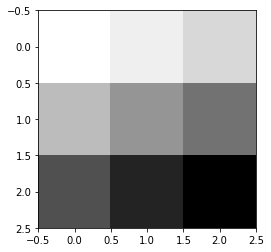

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
sess.close()

### p.47 Convolution Layer

image.shape (1, 3, 3, 1)
filter.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


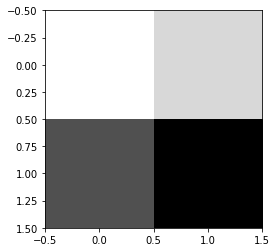

In [3]:
sess = tf.InteractiveSession()

print("image.shape", image.shape)
w_filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("filter.shape", w_filter.shape)
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2), cmap='Greys')

sess.close()

### p.49 Reshape

conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


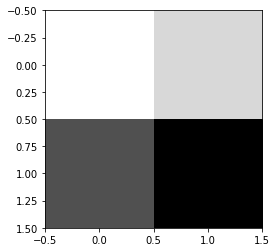

In [4]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1, 3, 3, 1)
w_filter = tf.constant(np.ones(4, dtype=np.float32).reshape(2, 2, 1, 1))
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2), cmap='Greys')

sess.close()

### p.56 Padding='VALID'

conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]]


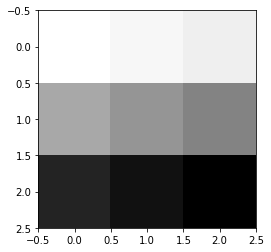

In [5]:
sess = tf.InteractiveSession()

image = np.arange(1, 50, dtype=np.float32).reshape(1, 7, 7, 1)
w_filter = tf.constant(np.full((3,3),2, dtype=np.float32).reshape(3, 3, 1, 1))
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 2, 2, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='Greys')

sess.close()

### p.60 Padding='SAME'

In [6]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1, 3, 3, 1)
w_filter = tf.constant(np.ones(4, dtype=np.float32).reshape(2, 2, 1, 1))
conv2d_1 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='VALID')
conv2d_2 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='SAME')
print(conv2d_1.eval().reshape(2,2))
print(conv2d_2.eval().reshape(3,3))

sess.close()

[[12. 16.]
 [24. 28.]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


### p.62 Padding - 5 x 5 -> 5 x 5

In [7]:
sess = tf.InteractiveSession()

image = np.ones(25, dtype=np.float32).reshape(1, 5, 5, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3, 3, 1, 1))
conv2d_2 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='SAME')
print(conv2d_2.eval().reshape(5,5))

sess.close()

[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]]


### p.65 Padding 고급

In [8]:
sess = tf.InteractiveSession()

image = np.ones(121, dtype=np.float32).reshape(1, 11, 11, 1)
w_filter = tf.constant(np.ones(36, dtype=np.float32).reshape(6, 6, 1, 1))
conv2d_1 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 4, 4, 1], padding='VALID')
conv2d_2 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 4, 4, 1], padding='SAME')
print(conv2d_1)
print(conv2d_2)
print(conv2d_1.eval().reshape(2, 2))
print(conv2d_2.eval().reshape(3, 3))

sess.close()

Tensor("Conv2D_6:0", shape=(1, 2, 2, 1), dtype=float32)
Tensor("Conv2D_7:0", shape=(1, 3, 3, 1), dtype=float32)
[[36. 36.]
 [36. 36.]]
[[25. 30. 20.]
 [30. 36. 24.]
 [20. 24. 16.]]


### p.71 Pooling

In [9]:
sess = tf.InteractiveSession()

image = np.arange(1, 17, dtype=np.float32).reshape(1, 4, 4, 1)
max_pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
avg_pool = tf.nn.avg_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

print(max_pool.eval().shape)
print(max_pool.eval().reshape(2, 2))
print(avg_pool.eval().reshape(2, 2))

sess.close()

(1, 2, 2, 1)
[[ 6.  8.]
 [14. 16.]]
[[ 3.5  5.5]
 [11.5 13.5]]


### p.72 Pooling - 고급

In [10]:
sess = tf.InteractiveSession()

image = np.arange(1, 37, dtype=np.float32).reshape(1, 6, 6, 1)
pool_1 = tf.nn.max_pool(image, ksize=[1,5,5,1], strides=[1,4,4,1], padding='VALID')
pool_2 = tf.nn.max_pool(image, ksize=[1,5,5,1], strides=[1,4,4,1], padding='SAME')

print(pool_1.eval().shape)
print(pool_1.eval().reshape(1, 1))
print(pool_2.eval().shape)
print(pool_2.eval().reshape(2, 2))

sess.close()

(1, 1, 1, 1)
[[29.]]
(1, 2, 2, 1)
[[22. 24.]
 [34. 36.]]


### p.77 답안

conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]]


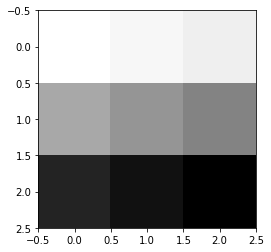

In [11]:
sess = tf.InteractiveSession()

image = np.arange(1, 50, dtype=np.float32).reshape(1, 7, 7, 1)
w_filter = tf.constant(np.full((3,3),2, dtype=np.float32).reshape(3, 3, 1, 1))
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 2, 2, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='Greys')

sess.close()

### p.85 Filter 3개

In [12]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1, 3, 3, 1)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3], dtype=np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter, 0, 2)
w_filter = np.swapaxes(w_filter, 1, 3)
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3).reshape(3, 3, 3)
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


### p.89 Filter 3개 - 2

In [13]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1, 3, 3, 1)
w_filter = np.random.random((1,3,2,2))
w_filter = np.swapaxes(w_filter, 0, 2)
w_filter = np.swapaxes(w_filter, 1, 3)
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3).reshape(3, 3, 3)
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[ 6.2283955   8.038742    1.5265172 ]
  [11.659434   13.46978     2.3611684 ]
  [ 6.739383    7.587756    0.42835605]]

 [[ 5.930396    8.302185    3.2973197 ]
  [13.045763   15.417552    5.979921  ]
  [12.735638   14.413755    6.2036476 ]]

 [[ 6.20831     8.37718     6.5399494 ]
  [12.71492    14.883789   10.376992  ]
  [ 8.57402     9.693029    3.4024053 ]]]


### p.92 Mnist

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


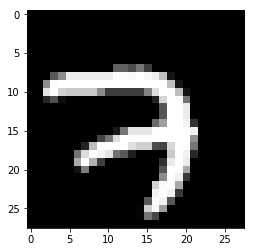

In [16]:
img = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img, cmap='gray')

### p.93 비슷해보이는 5장

Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


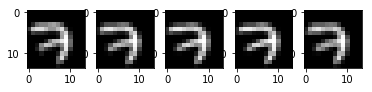

In [17]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5))
conv2d = tf.nn.conv2d(img, w_filter, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    
sess.close()

### p.95 필터를 음수도 나오게

Tensor("Conv2D_12:0", shape=(1, 14, 14, 5), dtype=float32)


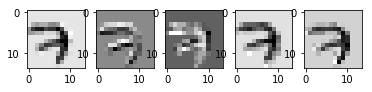

In [18]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5)) - 0.5
conv2d = tf.nn.conv2d(img, w_filter, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    
sess.close()

### p.109 ReLU

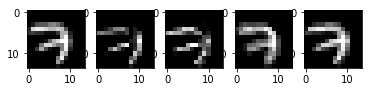

In [19]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5)) - 0.5
conv2d = tf.nn.conv2d(img, w_filter, strides=[1, 2, 2, 1], padding='SAME')
conv2d_img = conv2d.eval()
conv2d_img = tf.nn.relu(conv2d_img).eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    
sess.close()

### p.109 Leaky ReLU

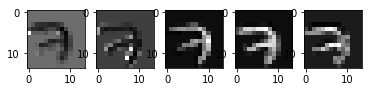

In [20]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5)) - 0.5
conv2d = tf.nn.conv2d(img, w_filter, strides=[1, 2, 2, 1], padding='SAME')
conv2d_img = conv2d.eval()
conv2d_img = tf.nn.leaky_relu(conv2d_img).eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    
sess.close()

### p.121 MNIST 학습

In [21]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L2_flat, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.391009184
Epoch: 0002 cost = 0.098247811
Epoch: 0003 cost = 0.074012881
Epoch: 0004 cost = 0.060703204
Epoch: 0005 cost = 0.051089959
Epoch: 0006 cost = 0.044144351
Epoch: 0007 cost = 0.040145029
Epoch: 0008 cost = 0.035082561
Epoch: 0009 cost = 0.029848771
Epoch: 0010 cost = 0.026804067
Epoch: 0011 cost = 0.022919716
Epoch: 0012 cost = 0.020861099
Epoch: 0013 cost = 0.017693707
Epoch: 0014 cost = 0.015462332
Epoch: 0015 cost = 0.013619192
Learning Finished!
Accuracy: 0.9875
Label:  [0]
Prediction:  [0]
